<a href="https://colab.research.google.com/github/Al3jandraMtz/P3_Riesgo_Relativo/blob/main/P3_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Realizar Autenticacion
from google.colab import auth
auth.authenticate_user()
#Conectar a Bigquery e importar librerias
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Define tu proyecto, dataset y tabla aquí
proyect_id= "proyecto2-super-caja"
dataset = "Data_set"
df = "User_info_default"

#Crea un cliente de BigQuery autenticado para el proyecto especificado.
client = bigquery.Client(project=proyect_id)

#Define una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python.
query = f"""
SELECT *
FROM `{proyect_id}.{dataset}.{df}`
"""

# Ejecutar consulta y convertir resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df.head())

   user_id  default_flag  age sex  last_month_salary  number_dependents
0       49             0   83   M             4694.0                  0
1       53             0   84   F             3001.0                  1
2       62             0   88   M                NaN               <NA>
3       69             0   23   M                NaN                  0
4       99             0   23   F             2200.0                  0


# Nueva sección

In [ ]:
#Buscar diferencias notables entre los valores mínimo, medio y máximo
import pandas as pd

# Seleccionar las columnas numéricas
numeric_columns = ['age', 'last_month_salary', 'number_dependents', 'default_flag']

# Generar un resumen estadístico para las columnas seleccionadas
describe_result = df[numeric_columns].describe()

# Mostrar el resumen estadístico
print(describe_result)


             age  last_month_salary  number_dependents  default_flag
count    36000.0       2.880100e+04            35057.0       36000.0
mean   52.417417       6.675052e+03            0.75808      0.018972
std    14.791331       1.296178e+04           1.118739      0.136429
min         21.0       0.000000e+00                0.0           0.0
25%         41.0       3.400000e+03                0.0           0.0
50%         52.0       5.400000e+03                0.0           0.0
75%         63.0       8.300000e+03                1.0           0.0
max        109.0       1.560100e+06               13.0           1.0


In [ ]:
#Rango intercuartílico (IQR) identificar outliers al ayudar a definir los límites a partir de los cuales los valores se consideran atípicos.
import pandas as pd

# Seleccionar las columnas numéricas
numeric_columns = ['age', 'last_month_salary', 'number_dependents']

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

# Diccionario para almacenar el conteo de outliers por variable
outliers_count = {}


# Detectar valores atípicos para cada columna numérica
for col in numeric_columns:
    seventy_fifth = df[col].quantile(0.75)
    twenty_fifth = df[col].quantile(0.25)
    iqr = seventy_fifth - twenty_fifth
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)
    col_outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers = pd.concat([outliers, col_outliers], axis=0)

        # Contar outliers por variable
    outliers_count[col] = len(col_outliers)

# Eliminar duplicados si hay valores atípicos en varias columnas
outliers = outliers.drop_duplicates()

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers con formato
outliers

# Mostrar el conteo de outliers por variable
for col, count in outliers_count.items():
    print(f'Número de outliers en {col}: {count}')


Número de outliers en age: 10
Número de outliers en last_month_salary: 1170
Número de outliers en number_dependents: 3230


In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (age)
# Calcular los percentiles
seventy_fifth = df['age'].quantile(0.75)
twenty_fifth = df['age'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['age'] < lower) | (df['age'] > upper)]

# Ordenar los resultados en orden descendente por la columna 'age'
outliers_sorted = outliers.sort_values(by='age', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted


user_id  default_flag  age sex  last_month_salary  number_dependents
8         135             0  109   M                NaN               <NA>
1256    26810             0  103   F                NaN                  0
327      6586             0  101   F             2883.0                  0
72       1276             0   98   F              950.0                  0
113      2169             0   97   M             3287.0                  0
633     13661             0   97   F             1500.0                  0
670     14729             0   97   M             5833.0                  0
792     17248             0   97   M                NaN                  0
910     19667             0   97   M             5158.0                  0
1524    33063             0   97   M             1747.0                  0

Text(0.5, 0, 'Edades')

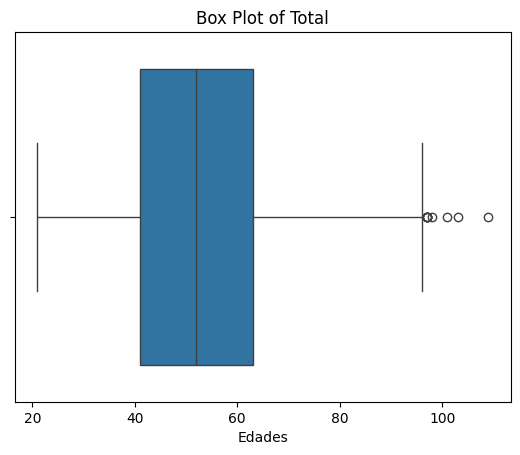

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='age')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Edades')

In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (last_month_salary)
# Calcular los percentiles
seventy_fifth = df['last_month_salary'].quantile(0.75)
twenty_fifth = df['last_month_salary'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['last_month_salary'] < lower) | (df['last_month_salary'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='last_month_salary', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted

user_id  default_flag  age sex  last_month_salary  number_dependents
12180    21096             0   44   F          1560100.0                  2
30979     6543             0   67   M           730483.0                  0
16676    23384             0   49   F           649587.0                  3
26832    22076             0   61   F           562466.0                  1
11499    24043             0   43   M           428250.0                  1
...        ...           ...  ...  ..                ...                ...
35042     8402             0   77   M            15666.0                  0
22740    20911             0   56   M            15666.0                  2
21609     7517             0   55   M            15664.0                  0
21438        8             0   55   M            15658.0                  0
20972    16322             0   54   M            15654.0                  3

[1170 rows x 6 columns]

Text(0.5, 0, 'last_month_salary')

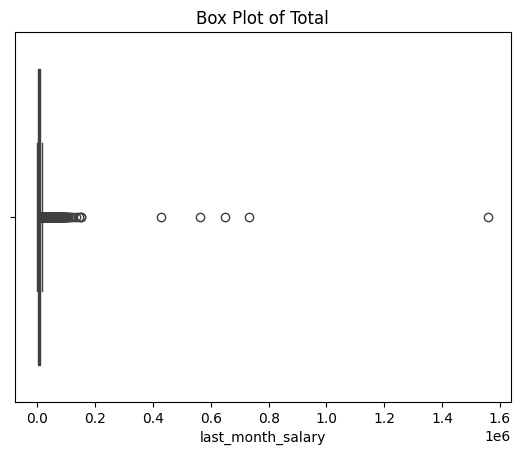

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='last_month_salary')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('last_month_salary')

In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (number_dependents)
# Calcular los percentiles
seventy_fifth = df['number_dependents'].quantile(0.75)
twenty_fifth = df['number_dependents'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['number_dependents'] < lower) | (df['number_dependents'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='number_dependents', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted

user_id  default_flag  age sex  last_month_salary  number_dependents
20078    15517             0   53   M             3333.0                 13
14638    14692             0   47   M             9166.0                 10
15711    22582             0   48   M            16666.0                  9
16033    34884             0   48   F            11400.0                  9
7061     12123             0   37   M             3300.0                  9
...        ...           ...  ...  ..                ...                ...
11666    32506             0   43   F             5281.0                  3
11671    32750             0   43   F            11667.0                  3
11686    33458             0   43   F             7666.0                  3
11703    34296             0   43   F             4050.0                  3
35966    32442             0   80   M             9000.0                  3

[3230 rows x 6 columns]

Text(0.5, 0, 'number_dependents')

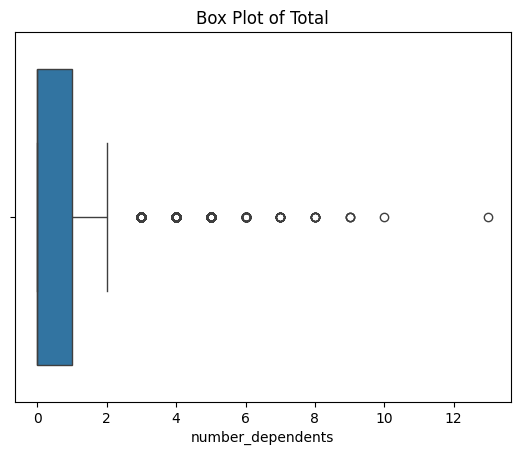

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='number_dependents')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('number_dependents')

In [ ]:
#Realizar Autenticacion
from google.colab import auth
auth.authenticate_user()
#Conectar a Bigquery e importar librerias
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Define tu proyecto, dataset y tabla aquí
proyect_id= "proyecto2-super-caja"
dataset = "Data_set"
df = "loans_detail"

#Crea un cliente de BigQuery autenticado para el proyecto especificado.
client = bigquery.Client(project=proyect_id)

#Define una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python.
query = f"""
SELECT *
FROM `{proyect_id}.{dataset}.{df}`
"""

# Ejecutar consulta y convertir resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df.head())

   user_id  more_90_days_overdue  using_lines_not_secured_personal_assets  \
0        1                     0                                 0.667083   
1        2                     0                                 0.007093   
2        3                     0                                 0.091213   
3        4                     0                                 0.112680   
4        5                     0                                 0.323985   

   number_times_delayed_payment_loan_30_59_days  debt_ratio  \
0                                             0    0.153112   
1                                             0    0.148800   
2                                             0    0.351635   
3                                             0    0.065959   
4                                             0    0.352151   

   number_times_delayed_payment_loan_60_89_days  
0                                             0  
1                                             0  
2       

In [ ]:
#Buscar diferencias notables entre los valores mínimo, medio y máximo
import pandas as pd

# Seleccionar las columnas numéricas
numeric_columns = ['more_90_days_overdue', 'using_lines_not_secured_personal_assets', 'number_times_delayed_payment_loan_30_59_days', 'debt_ratio', 'number_times_delayed_payment_loan_60_89_days']

# Generar un resumen estadístico para las columnas seleccionadas
describe_result = df[numeric_columns].describe()

# Mostrar el resumen estadístico
print(describe_result)

       more_90_days_overdue  using_lines_not_secured_personal_assets  \
count               36000.0                             36000.000000   
mean               0.260806                                 5.807040   
std                4.121365                               223.407144   
min                     0.0                                 0.000000   
25%                     0.0                                 0.029526   
50%                     0.0                                 0.149655   
75%                     0.0                                 0.548529   
max                    98.0                             22000.000000   

       number_times_delayed_payment_loan_30_59_days     debt_ratio  \
count                                       36000.0   36000.000000   
mean                                       0.419278     351.580075   
std                                         4.14402    2011.635341   
min                                             0.0       0.000000   
2

In [ ]:
#Rango intercuartílico (IQR) identificar outliers al ayudar a definir los límites a partir de los cuales los valores se consideran atípicos.
import pandas as pd

# Seleccionar las columnas numéricas
numeric_columns = ['more_90_days_overdue', 'using_lines_not_secured_personal_assets', 'number_times_delayed_payment_loan_30_59_days', 'debt_ratio', 'number_times_delayed_payment_loan_60_89_days']

# Crear un DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame()

# Diccionario para almacenar el conteo de outliers por variable
outliers_count = {}


# Detectar valores atípicos para cada columna numérica
for col in numeric_columns:
    seventy_fifth = df[col].quantile(0.75)
    twenty_fifth = df[col].quantile(0.25)
    iqr = seventy_fifth - twenty_fifth
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)
    col_outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers = pd.concat([outliers, col_outliers], axis=0)

        # Contar outliers por variable
    outliers_count[col] = len(col_outliers)

# Eliminar duplicados si hay valores atípicos en varias columnas
outliers = outliers.drop_duplicates()

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers con formato
outliers

# Mostrar el conteo de outliers por variable
for col, count in outliers_count.items():
    print(f'Número de outliers en {col}: {count}')

Número de outliers en more_90_days_overdue: 1946
Número de outliers en using_lines_not_secured_personal_assets: 177
Número de outliers en number_times_delayed_payment_loan_30_59_days: 5812
Número de outliers en debt_ratio: 7579
Número de outliers en number_times_delayed_payment_loan_60_89_days: 1865


Text(0.5, 0, 'using_lines_not_secured_personal_assets')

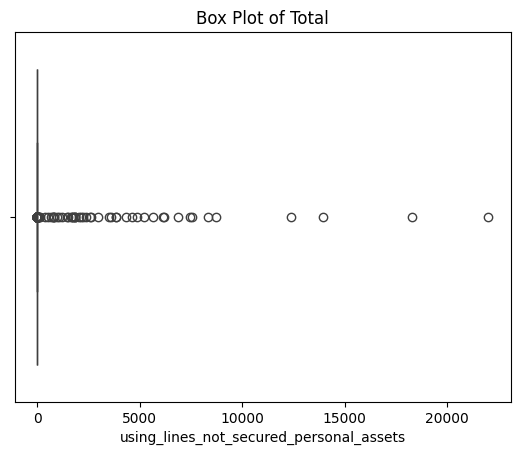

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='using_lines_not_secured_personal_assets')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('using_lines_not_secured_personal_assets')

In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (using_lines_not_secured_personal_assets)
# Calcular los percentiles
seventy_fifth = df['using_lines_not_secured_personal_assets'].quantile(0.75)
twenty_fifth = df['using_lines_not_secured_personal_assets'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['using_lines_not_secured_personal_assets'] < lower) | (df['using_lines_not_secured_personal_assets'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='using_lines_not_secured_personal_assets', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted

user_id  more_90_days_overdue  using_lines_not_secured_personal_assets  \
7858     10876                     0                             22000.000000   
4709      6579                     0                             18300.000000   
2617      3680                     0                             13930.000000   
29778    15531                     0                             12369.000000   
1007      1410                     0                              8710.000000   
...        ...                   ...                                      ...   
30723     1866                     0                                 1.350970   
26551     5236                     3                                 1.346205   
30745     5777                     1                                 1.343013   
4578      6407                     0                                 1.335548   
27051    10730                     3                                 1.330677   

       number_times_delayed_payment_loan_30_59_days   debt_ratio  \
7858                                              0     1.080020   
4709                                              0     0.221582   
2617                                              0  4902.000000   
29778                                             2     0.134352   
1007                                              0     0.442809   
...                                             ...          ...   
30723                                             4     0.361006   
26551                                             1     0.124943   
30745                                             4     0.416722   
4578                                              0    21.000000   
27051                                             1     0.106943   

       number_times_delayed_payment_loan_60_89_days  
7858                                              0  
4709                                              0  
2617                                              0  
29778                                             0  
1007                                              0  
...                                             ...  
30723                                             2  
26551                                             1  
30745                                             3  
4578                                              0  
27051                                             0  

[177 rows x 6 columns]

In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (number_times_delayed_payment_loan_30_59_days)
# Calcular los percentiles
seventy_fifth = df['number_times_delayed_payment_loan_30_59_days'].quantile(0.75)
twenty_fifth = df['number_times_delayed_payment_loan_30_59_days'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['number_times_delayed_payment_loan_30_59_days'] < lower) | (df['number_times_delayed_payment_loan_30_59_days'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='number_times_delayed_payment_loan_30_59_days', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted

user_id  more_90_days_overdue  using_lines_not_secured_personal_assets  \
35999    35897                    98                                 1.000000   
35952     6748                    98                                 1.000000   
35965    17166                    98                                 1.000000   
35964    16212                    98                                 1.000000   
35963    16129                    98                                 1.000000   
...        ...                   ...                                      ...   
27994    21006                     0                                 0.532479   
27993    20992                     0                                 0.441367   
27992    20984                     0                                 0.015231   
27991    20980                     0                                 0.010890   
28965    31883                     0                                 0.926675   

       number_times_delayed_payment_loan_30_59_days   debt_ratio  \
35999                                            98     8.000000   
35952                                            98    15.000000   
35965                                            98    45.000000   
35964                                            98     0.000000   
35963                                            98     0.000000   
...                                             ...          ...   
27994                                             1     0.202496   
27993                                             1     0.933383   
27992                                             1     0.241446   
27991                                             1  1236.000000   
28965                                             1     0.075805   

       number_times_delayed_payment_loan_60_89_days  
35999                                            98  
35952                                            98  
35965                                            98  
35964                                            98  
35963                                            98  
...                                             ...  
27994                                             0  
27993                                             0  
27992                                             0  
27991                                             0  
28965                                             0  

[5812 rows x 6 columns]

Text(0.5, 0, 'number_times_delayed_payment_loan_30_59_days')

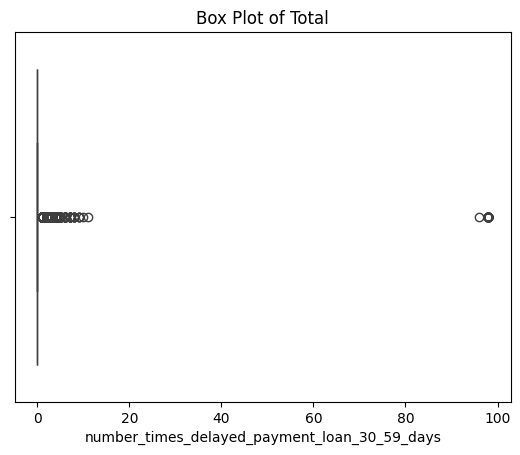

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='number_times_delayed_payment_loan_30_59_days')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('number_times_delayed_payment_loan_30_59_days')

In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (number_times_delayed_payment_loan_60_89_days)
# Calcular los percentiles
seventy_fifth = df['number_times_delayed_payment_loan_60_89_days'].quantile(0.75)
twenty_fifth = df['number_times_delayed_payment_loan_60_89_days'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['number_times_delayed_payment_loan_60_89_days'] < lower) | (df['number_times_delayed_payment_loan_60_89_days'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='number_times_delayed_payment_loan_60_89_days', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted

user_id  more_90_days_overdue  using_lines_not_secured_personal_assets  \
35999    35897                    98                                 1.000000   
35954     8394                    98                                 1.000000   
35968    19634                    98                                 1.000000   
35967    18161                    98                                 1.000000   
35966    17431                    98                                 1.000000   
...        ...                   ...                                      ...   
26662     6452                     6                                 0.999939   
26646     6223                     0                                 0.917168   
26632     6065                     1                                 0.934605   
26627     5993                     0                                 0.038511   
28986    32116                     0                                 0.036187   

       number_times_delayed_payment_loan_30_59_days  debt_ratio  \
35999                                            98    8.000000   
35954                                            98    0.000000   
35968                                            98    0.008055   
35967                                            98    0.000000   
35966                                            98    0.000000   
...                                             ...         ...   
26662                                             1    0.533593   
26646                                             1    0.311875   
26632                                             1    0.019987   
26627                                             1    0.070933   
28986                                             1    0.280036   

       number_times_delayed_payment_loan_60_89_days  
35999                                            98  
35954                                            98  
35968                                            98  
35967                                            98  
35966                                            98  
...                                             ...  
26662                                             1  
26646                                             1  
26632                                             1  
26627                                             1  
28986                                             1  

[1865 rows x 6 columns]

Text(0.5, 0, 'number_times_delayed_payment_loan_60_89_days')

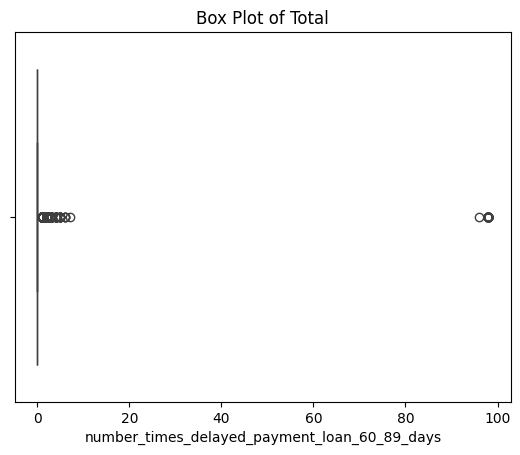

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='number_times_delayed_payment_loan_60_89_days')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('number_times_delayed_payment_loan_60_89_days')

In [ ]:
# Realizar Autenticacion
from google.colab import auth
auth.authenticate_user()

# Conectar a BigQuery e importar librerías
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Definir tu proyecto, dataset y tabla aquí
proyect_id = "proyecto2-super-caja"
dataset = "Data_set"
table = "loans_detail"

# Crear un cliente de BigQuery autenticado para el proyecto especificado
client = bigquery.Client(project=proyect_id)

# Definir una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python
query = f"""
SELECT *
FROM `{proyect_id}.{dataset}.{table}`
"""

# Ejecutar la consulta SQL en BigQuery y almacenar los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Rango intercuartílico (IQR) desglosado por variable numérica (more_90_days_overdue)
# Calcular los percentiles
seventy_fifth = df['more_90_days_overdue'].quantile(0.75)
twenty_fifth = df['more_90_days_overdue'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['more_90_days_overdue'] < lower) | (df['more_90_days_overdue'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='more_90_days_overdue', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted.head()


user_id  more_90_days_overdue  using_lines_not_secured_personal_assets  \
35999    35897                    98                                      1.0   
35953     6787                    98                                      1.0   
35968    19634                    98                                      1.0   
35967    18161                    98                                      1.0   
35966    17431                    98                                      1.0   

       number_times_delayed_payment_loan_30_59_days  debt_ratio  \
35999                                            98    8.000000   
35953                                            98    0.007578   
35968                                            98    0.008055   
35967                                            98    0.000000   
35966                                            98    0.000000   

       number_times_delayed_payment_loan_60_89_days  
35999                                            98  
35953                                            98  
35968                                            98  
35967                                            98  
35966                                            98

Text(0.5, 0, 'more_90_days_overdue')

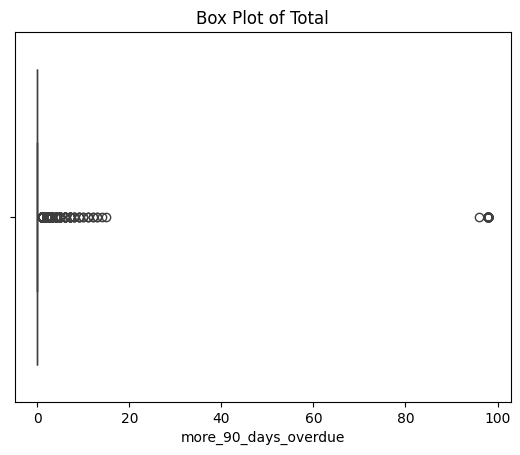

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='more_90_days_overdue')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('more_90_days_overdue')

Text(0.5, 0, 'debt_ratio')

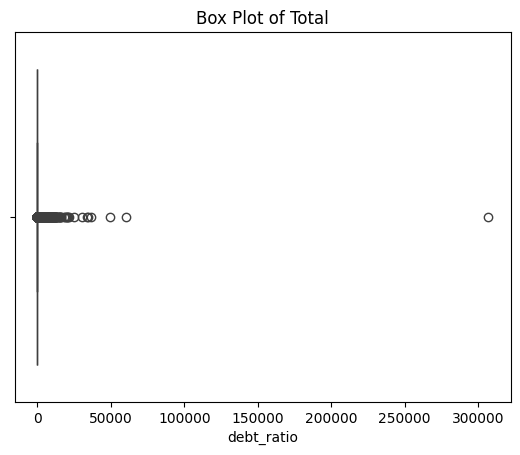

In [ ]:
import seaborn as sns
# Create a box plot
g = sns.boxplot(data=df, x='debt_ratio')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('debt_ratio')

In [ ]:
# Rango intercuartílico (IQR) desglosado por variable numérica (debt_ratio)
# Calcular los percentiles
seventy_fifth = df['debt_ratio'].quantile(0.75)
twenty_fifth = df['debt_ratio'].quantile(0.25)

# Obtener IQR
iqr = seventy_fifth - twenty_fifth

# Umbrales superiores e inferiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subconjunto del dataset con valores atípicos
outliers = df[(df['debt_ratio'] < lower) | (df['debt_ratio'] > upper)]

# Ordenar los resultados en orden descendente por la columna
outliers_sorted = outliers.sort_values(by='debt_ratio', ascending=False)

# Mostrar los primeros registros de outliers
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Mostrar el DataFrame de outliers ordenado con formato
outliers_sorted

user_id  more_90_days_overdue  using_lines_not_secured_personal_assets  \
27785    18739                     0                                 0.034290   
9623     13321                     0                                 0.351737   
29562     8057                     0                                 0.895729   
31569     8821                     0                                 0.000000   
17880    24713                     0                                 0.104445   
...        ...                   ...                                      ...   
26550     5218                     0                                 0.243994   
28694    28659                     0                                 0.030896   
26560     5353                     0                                 0.272500   
15391    21272                     0                                 0.358480   
26574     5507                     0                                 0.150342   

       number_times_delayed_payment_loan_30_59_days     debt_ratio  \
27785                                             1  307001.000000   
9623                                              0   60212.000000   
29562                                             2   49112.000000   
31569                                             0   36705.000000   
17880                                             0   34719.000000   
...                                             ...            ...   
26550                                             1       1.950820   
28694                                             1       1.947211   
26560                                             1       1.945596   
15391                                             0       1.929252   
26574                                             1       1.920328   

       number_times_delayed_payment_loan_60_89_days  
27785                                             0  
9623                                              1  
29562                                             0  
31569                                             0  
17880                                             0  
...                                             ...  
26550                                             0  
28694                                             0  
26560                                             0  
15391                                             0  
26574                                             0  

[7579 rows x 6 columns]

In [ ]:
#Realizar Autenticacion
from google.colab import auth
auth.authenticate_user()
#Conectar a Bigquery e importar librerias
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Define tu proyecto, dataset y tabla aquí
proyect_id= "proyecto2-super-caja"
dataset = "Data_set"
df = "loans_outstanding"

#Crea un cliente de BigQuery autenticado para el proyecto especificado.
client = bigquery.Client(project=proyect_id)

#Define una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python.
query = f"""
SELECT *
FROM `{proyect_id}.{dataset}.{df}`
"""

# Ejecutar consulta y convertir resultados en un DataFrame de pandas
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df.head())

   loan_id  user_id    loan_type
0        1        2  real estate
1        2        3  real estate
2        3        5  REAL ESTATE
3        4        5  real estate
4        5        8  real estate


In [ ]:
# Realizar Autenticación
from google.colab import auth
auth.authenticate_user()

# Conectar a BigQuery e importar librerías
from google.cloud import bigquery
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Define tu proyecto, dataset y tabla aquí
proyect_id = "riesgo-relativo-p3"
dataset = "Data_Set"
table = "Data_Set_Completo"

# Crea un cliente de BigQuery autenticado para el proyecto especificado.
client = bigquery.Client(project=proyect_id)

# Consulta SQL para extraer datos de BigQuery
query = f"""
    SELECT *
    FROM `{proyect_id}.{dataset}.{table}`
"""

# Ejecuta la consulta y carga los datos en un DataFrame
df = client.query(query).to_dataframe()

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor de la matriz de correlación
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis'
)

# Mostrar el mapa de calor
fig.update_layout(title='Matriz de Correlación', xaxis_nticks=36)
fig.show()



In [ ]:
#Realizar Autenticacion
from google.colab import auth
auth.authenticate_user()
#Conectar a Bigquery e importar librerias
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Define tu proyecto, dataset y tabla aquí
proyect_id= "proyecto2-super-caja"
dataset = "Data_set"
df = "loans_outstanding"

#Crea un cliente de BigQuery autenticado para el proyecto especificado.
client = bigquery.Client(project=proyect_id)

# Define la consulta SQL
sql_query = """
WITH base_data AS (
    SELECT
        age,
        default_flag
    FROM `proyecto2-super-caja.Data_set.Data_Set_Completo`
),
quartiles AS (
    SELECT
        age,
        default_flag,
        NTILE(4) OVER (ORDER BY age) AS age_quartile
    FROM base_data
),
quartile_risk AS (
    SELECT
        age_quartile,
        COUNT(*) AS total_count,
        SUM(default_flag) AS total_bad_payers,
        COUNT(*) - SUM(default_flag) AS total_good_payers
    FROM quartiles
    GROUP BY age_quartile
),
quartile_ranges AS (
    SELECT
        age_quartile,
        MIN(age) AS min_age,
        MAX(age) AS max_age
    FROM quartiles
    GROUP BY age_quartile
),
risk_relative AS (
    SELECT
        q1.age_quartile AS quartile_1,
        q1.total_bad_payers AS bad_payers_q1,
        q1.total_good_payers AS good_payers_q1,
        q2.age_quartile AS quartile_2,
        q2.total_bad_payers AS bad_payers_q2,
        q2.total_good_payers AS good_payers_q2,
        q3.age_quartile AS quartile_3,
        q3.total_bad_payers AS bad_payers_q3,
        q3.total_good_payers AS good_payers_q3,
        q4.age_quartile AS quartile_4,
        q4.total_bad_payers AS bad_payers_q4,
        q4.total_good_payers AS good_payers_q4,
        (q1.total_bad_payers * 1.0 / (q1.total_bad_payers + q1.total_good_payers)) /
        (q3.total_bad_payers * 1.0 / (q3.total_bad_payers + q3.total_good_payers)) AS riesgo_relativo
    FROM quartile_risk q1
    JOIN quartile_risk q2 ON q2.age_quartile = 2
    JOIN quartile_risk q3 ON q3.age_quartile = 3
    JOIN quartile_risk q4 ON q4.age_quartile = 4
    WHERE q1.age_quartile = 1
)
SELECT
    quartile_1,
    bad_payers_q1,
    good_payers_q1,
    quartile_2,
    bad_payers_q2,
    good_payers_q2,
    quartile_3,
    bad_payers_q3,
    good_payers_q3,
    quartile_4,
    bad_payers_q4,
    good_payers_q4,
    riesgo_relativo
FROM risk_relative
"""

# Ejecuta la consulta SQL y carga los resultados en un DataFrame
client = bigquery.Client(project=proyect_id)

# Ejecutar consulta y convertir resultados en un DataFrame de pandas
df = client.query(sql_query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df.head())


   quartile_1  bad_payers_q1  good_payers_q1  quartile_2  bad_payers_q2  \
0           1            274            8708           2            196   

   good_payers_q2  quartile_3  bad_payers_q3  good_payers_q3  quartile_4  \
0            8786           3            117            8865           4   

   bad_payers_q4  good_payers_q4  riesgo_relativo  
0             47            8934          2.34188  


In [ ]:
# Cargar los datos en DataFrames desde los archivos subidos
user_info = pd.read_csv('/sample_data/user_info.csv')
loans_detail = pd.read_csv('/sample_data/loans_detail.csv')
default = pd.read_csv('/sample_data/default.csv')
datset1 = pd.read_csv('/sample_data/Data_Set_Completo.csv')
score_risk = pd.read_csv('/sample_data/Risk_score.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/sample_data/user_info.csv'

In [ ]:
# Realizar Autenticación
from google.colab import auth
auth.authenticate_user()

# Conectar a BigQuery e importar librerías
from google.cloud import bigquery

# Definir tu proyecto, dataset y tabla aquí
proyect_id = "riesgo-relativo-p3"
dataset = "Data_Set"
table = "Data_Set_Completo"

# Crear un cliente de BigQuery autenticado para el proyecto especificado
client = bigquery.Client(project=proyect_id)

# Definir una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python
query = f"""
SELECT *
FROM `{proyect_id}.{dataset}.{table}`
"""

# Ejecutar la consulta SQL en BigQuery y almacenar los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
df.head()



user_id  default_flag  age generational_group sex  last_month_salary  \
0        1             0   55       Generacion X   F             2200.0   
1        2             0   44       Generacion X   M             7499.0   
2        3             0   54       Generacion X   M             5900.0   
3        4             0   54       Generacion X   F             2167.0   
4        5             0   42         Millenials   M            10415.0   

   number_dependents  real_estate_loan_type  others_loan_type  \
0                  0                      0                 3   
1                  0                      1                19   
2                  0                      1                14   
3                  0                      0                 3   
4                  2                      1                 6   

   total_loan_type  debt_ratio Incumplimiento_debt_ratio  \
0                3    0.153112               Bajo Riesgo   
1               20    0.148800               Bajo Riesgo   
2               15    0.351635              Medio Riesgo   
3                3    0.065959               Bajo Riesgo   
4                7    0.352151              Medio Riesgo   

   using_lines_not_secured_personal_assets Incumplimiento_unsec_line  \
0                                 0.667083               Alto Riesgo   
1                                 0.007093               Bajo Riesgo   
2                                 0.091213               Bajo Riesgo   
3                                 0.112680               Bajo Riesgo   
4                                 0.323985              Medio Riesgo   

   delay_30_59_90 segmentacion_delay  
0               0     Ningún Retraso  
1               0     Ningún Retraso  
2               1       Poco Retraso  
3               0     Ningún Retraso  
4               0     Ningún Retraso

In [ ]:
# Instalación de las bibliotecas necesarias
!pip install pandas numpy scikit-learn

# Importación de las bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Creación de variables dummies
df['age_dummy'] = np.where(df['age'] < 40, 1, 0)
df['debt_ratio_dummy'] = np.where(df['debt_ratio'] >= 0.36, 1, 0)
df['using_lines_no_assets_dummy'] = np.where(df['using_lines_not_secured_personal_assets'] > 0.54, 1, 0)
df['delay_30_60_90_dummy'] = np.where(df['delay_30_59_90'] > 0, 1, 0)

# Mostrar las primeras filas del DataFrame
df.head()


user_id  default_flag  age generational_group sex  last_month_salary  \
0        1             0   55       Generacion X   F             2200.0   
1        2             0   44       Generacion X   M             7499.0   
2        3             0   54       Generacion X   M             5900.0   
3        4             0   54       Generacion X   F             2167.0   
4        5             0   42         Millenials   M            10415.0   

   number_dependents  real_estate_loan_type  others_loan_type  \
0                  0                      0                 3   
1                  0                      1                19   
2                  0                      1                14   
3                  0                      0                 3   
4                  2                      1                 6   

   total_loan_type  debt_ratio Incumplimiento_debt_ratio  \
0                3    0.153112               Bajo Riesgo   
1               20    0.148800               Bajo Riesgo   
2               15    0.351635              Medio Riesgo   
3                3    0.065959               Bajo Riesgo   
4                7    0.352151              Medio Riesgo   

   using_lines_not_secured_personal_assets Incumplimiento_unsec_line  \
0                                 0.667083               Alto Riesgo   
1                                 0.007093               Bajo Riesgo   
2                                 0.091213               Bajo Riesgo   
3                                 0.112680               Bajo Riesgo   
4                                 0.323985              Medio Riesgo   

   delay_30_59_90 segmentacion_delay  age_dummy  debt_ratio_dummy  \
0               0     Ningún Retraso          0                 0   
1               0     Ningún Retraso          0                 0   
2               1       Poco Retraso          0                 0   
3               0     Ningún Retraso          0                 0   
4               0     Ningún Retraso          0                 0   

   using_lines_no_assets_dummy  delay_30_60_90_dummy  
0                            1                     0  
1                            0                     0  
2                            0                     1  
3                            0                     0  
4                            0                     0

In [ ]:
# Definir las características (features) y la etiqueta (label)
X = df[['age_dummy', 'debt_ratio_dummy', 'using_lines_no_assets_dummy', 'delay_30_60_90_dummy']]
y = df['default_flag']  # Suponiendo que esta es la columna objetivo

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicción de probabilidades (risk score)
df['risk_score'] = logreg.predict_proba(X)[:,1]  # Probabilidad de default

# Clasificación basada en el risk_score
df['payment_classification'] = np.where(df['risk_score'] <= 0.4, 'Riesgo Bajo',
                                        np.where(df['risk_score'] <= 0.6, 'Riesgo Medio', 'Riesgo Alto'))
# Predicciones de clasificación para la matriz de confusión
y_pred = logreg.predict(X_test)

# Generación de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Cálculo de las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



[[10588     0]
 [  189     0]]
Accuracy: 0.9824626519439548
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Equilibrio de las clases:
default_flag
0    35291
1      632
Name: count, dtype: Int64


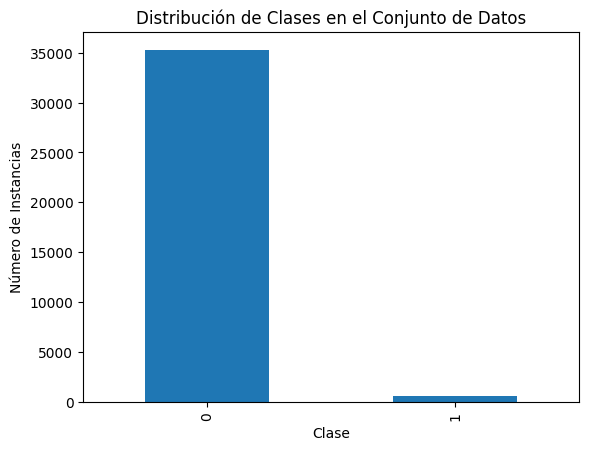

In [ ]:
# Revisar el equilibrio de las clases
class_balance = df['default_flag'].value_counts()

# Mostrar el equilibrio de las clases
print("Equilibrio de las clases:")
print(class_balance)

# Opcional: Visualizar el equilibrio de las clases con un gráfico de barras
import matplotlib.pyplot as plt

class_balance.plot(kind='bar')
plt.title('Distribución de Clases en el Conjunto de Datos')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Supongamos que df ya está cargado y contiene las columnas necesarias

# Crear variables segmentadas por cuartiles
if 'age' in df.columns:
    df['age_quartile'] = pd.qcut(df['age'], q=4, labels=False)
if 'debt_ratio' in df.columns:
    df['debt_ratio_quartile'] = pd.qcut(df['debt_ratio'], q=4, labels=False)
if 'using_lines_not_secured_personal_assets' in df.columns:
    df['using_lines_no_assets_quartile'] = pd.qcut(df['using_lines_not_secured_personal_assets'], q=4, labels=False)

# Para delay_30_59_90, si hay muchos ceros, utilizamos pd.cut() en su lugar
if 'delay_30_59_90' in df.columns:
    df['delay_30_59_90_quartile'] = pd.cut(df['delay_30_59_90'], bins=[-1, 0, 1, 10, df['delay_30_59_90'].max()], labels=False)

# Convertir los cuartiles en variables dummies
if 'age_quartile' in df.columns:
    age_dummies = pd.get_dummies(df['age_quartile'], prefix='age')
else:
    age_dummies = pd.DataFrame()

if 'debt_ratio_quartile' in df.columns:
    debt_ratio_dummies = pd.get_dummies(df['debt_ratio_quartile'], prefix='debt_ratio')
else:
    debt_ratio_dummies = pd.DataFrame()

if 'using_lines_no_assets_quartile' in df.columns:
    using_lines_no_assets_dummies = pd.get_dummies(df['using_lines_no_assets_quartile'], prefix='using_lines_no_assets')
else:
    using_lines_no_assets_dummies = pd.DataFrame()

if 'delay_30_59_90_quartile' in df.columns:
    delay_30_59_90_dummies = pd.get_dummies(df['delay_30_59_90_quartile'], prefix='delay_30_59_90')
else:
    delay_30_59_90_dummies = pd.DataFrame()

# Concatenar las dummies al DataFrame original
df = pd.concat([df, age_dummies, debt_ratio_dummies, using_lines_no_assets_dummies, delay_30_59_90_dummies], axis=1)

# Asegurarse de que todas las características sean numéricas
df = pd.get_dummies(df, drop_first=True)

# Eliminar las columnas originales si no son necesarias (después de crear dummies)
df.drop(columns=['age', 'debt_ratio', 'using_lines_not_secured_personal_assets', 'delay_30_59_90',
                 'age_quartile', 'debt_ratio_quartile', 'using_lines_no_assets_quartile', 'delay_30_59_90_quartile'], inplace=True, errors='ignore')

# Definir las características (features) y la etiqueta (label)
X = df.drop(columns=['default_flag'])  # Todas las columnas menos la etiqueta objetivo
y = df['default_flag']  # Etiqueta objetivo

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputar valores faltantes en X_train y X_test con la mediana de cada columna
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenamiento del modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_imputed, y_train)

# Predicción de probabilidades (risk score)
df['risk_score'] = logreg.predict_proba(imputer.transform(X))[:,1]  # Probabilidad de default

# Clasificación basada en el risk_score
df['payment_classification'] = np.where(df['risk_score'] <= 0.4, 'Riesgo Bajo',
                                        np.where(df['risk_score'] <= 0.6, 'Riesgo Medio', 'Riesgo Alto'))

# Predicciones de clasificación para la matriz de confusión
y_pred = logreg.predict(X_test_imputed)

# Generación de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Cálculo de las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")






Matriz de Confusión:
[[10578    10]
 [  114    75]]
Accuracy: 0.9884940150320126
Precision: 0.8823529411764706
Recall: 0.3968253968253968
F1 Score: 0.5474452554744526


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Supongamos que df ya está cargado y contiene las columnas necesarias

# Separar las columnas numéricas y no numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Verifica si 'age' está en numeric_cols antes de la imputación
if 'age' not in numeric_cols:
    print("'age' no se encuentra entre las columnas numéricas")
else:
    print("'age' está presente en las columnas numéricas")

# Imputar solo las columnas numéricas
imputer = SimpleImputer(strategy='median')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Combinar las columnas imputadas con las columnas no numéricas originales
df_imputed = pd.concat([df_numeric_imputed, df[non_numeric_cols].reset_index(drop=True)], axis=1)

# Verificar el número de filas después de la imputación
print("Número de filas después de la imputación:", df_imputed.shape[0])

# Verificar si la columna 'age' existe en df_imputed antes de segmentar
if 'age' in df_imputed.columns:
    df_imputed['age_quartile'] = pd.qcut(df_imputed['age'], q=4, labels=False)
    print("Segmentación en cuartiles para 'age' realizada con éxito")
else:
    print("'age' no se encuentra en el DataFrame después de la imputación")

# Continuar con el resto de las transformaciones
if 'debt_ratio' in df_imputed.columns:
    df_imputed['debt_ratio_quartile'] = pd.qcut(df_imputed['debt_ratio'], q=4, labels=False)

if 'using_lines_not_secured_personal_assets' in df_imputed.columns:
    df_imputed['using_lines_no_assets_quartile'] = pd.qcut(df_imputed['using_lines_not_secured_personal_assets'], q=4, labels=False)

# Para delay_30_59_90, si hay muchos ceros, utilizamos pd.cut() en su lugar
if 'delay_30_59_90' in df_imputed.columns:
    df_imputed['delay_30_59_90_quartile'] = pd.cut(df_imputed['delay_30_59_90'], bins=[-1, 0, 1, 10, df_imputed['delay_30_59_90'].max()], labels=False)

# Continuar con la creación de variables d



'age' no se encuentra entre las columnas numéricas
Número de filas después de la imputación: 35923
'age' no se encuentra en el DataFrame después de la imputación


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Supongamos que df ya está cargado y contiene las columnas necesarias

# Imputar valores faltantes en todas las columnas numéricas con la mediana
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Crear variables segmentadas por cuartiles solo si las columnas existen
if 'age' in df.columns:
    df['age_quartile'] = pd.qcut(df['age'], q=4, labels=False)
if 'debt_ratio' in df.columns:
    df['debt_ratio_quartile'] = pd.qcut(df['debt_ratio'], q=4, labels=False)
if 'using_lines_not_secured_personal_assets' in df.columns:
    df['using_lines_no_assets_quartile'] = pd.qcut(df['using_lines_not_secured_personal_assets'], q=4, labels=False)

# Para delay_30_59_90, si hay muchos ceros, utilizamos pd.cut() en su lugar
if 'delay_30_59_90' in df.columns:
    df['delay_30_59_90_quartile'] = pd.cut(df['delay_30_59_90'], bins=[-1, 0, 1, 10, df['delay_30_59_90'].max()], labels=False)

# Convertir los cuartiles en variables dummies solo si las columnas segmentadas existen
if 'age_quartile' in df.columns:
    age_dummies = pd.get_dummies(df['age_quartile'], prefix='age')
else:
    age_dummies = pd.DataFrame()

if 'debt_ratio_quartile' in df.columns:
    debt_ratio_dummies = pd.get_dummies(df['debt_ratio_quartile'], prefix='debt_ratio')
else:
    debt_ratio_dummies = pd.DataFrame()

if 'using_lines_no_assets_quartile' in df.columns:
    using_lines_no_assets_dummies = pd.get_dummies(df['using_lines_no_assets_quartile'], prefix='using_lines_no_assets')
else:
    using_lines_no_assets_dummies = pd.DataFrame()

if 'delay_30_59_90_quartile' in df.columns:
    delay_30_59_90_dummies = pd.get_dummies(df['delay_30_59_90_quartile'], prefix='delay_30_59_90')
else:
    delay_30_59_90_dummies = pd.DataFrame()

# Concatenar las dummies al DataFrame original
df = pd.concat([df, age_dummies, debt_ratio_dummies, using_lines_no_assets_dummies, delay_30_59_90_dummies], axis=1)

# Asegurarse de que todas las características sean numéricas
df = pd.get_dummies(df, drop_first=True)

# Eliminar las columnas originales si no son necesarias (después de crear dummies)
df.drop(columns=['age', 'debt_ratio', 'using_lines_not_secured_personal_assets', 'delay_30_59_90',
                 'age_quartile', 'debt_ratio_quartile', 'using_lines_no_assets_quartile', 'delay_30_59_90_quartile'], inplace=True, errors='ignore')

# Definir las características (features) y la etiqueta (label)
X = df.drop(columns=['default_flag'])  # Todas las columnas menos la etiqueta objetivo
y = df['default_flag']  # Etiqueta objetivo

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicción de probabilidades (risk score)
df['risk_score'] = logreg.predict_proba(X)[:,1]  # Probabilidad de default

# Clasificación basada en el risk_score
df['payment_classification'] = np.where(df['risk_score'] <= 0.4, 'Riesgo Bajo',
                                        np.where(df['risk_score'] <= 0.6, 'Riesgo Medio', 'Riesgo Alto'))

# Predicciones de clasificación para la matriz de confusión
y_pred = logreg.predict(X_test)

# Generación de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Cálculo de las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Matriz de Confusión:
[[10575    13]
 [  116    73]]
Accuracy: 0.988030064025239
Precision: 0.8488372093023255
Recall: 0.3862433862433862
F1 Score: 0.5309090909090909
